En el siguiente ejercicio se presenta un set de datos con el que trataremos de clasificar si un cliente es solvente o no a la hora de devolver un crédito solicitado a una entidad bancaria.

Para ponernos en situación pertenecemos al equipo de Data Science de una entidad bancaria y se no pide realizar un modelo que sea capaz de evaluar el riesgo de un cliente cuando nos solicita un crédito a través de una tarjeta de crédito en base al histórico de datos que os pasan desde el equipo de negocio (datos extraidos de kaggle).

A continuación os dejan una breve explicación de en que consiste cada una de las variables del conjunto de datos:

- BAD: 1 = candidato con préstamo incumplido o con mora; 0 = candidato que paga su deuda y no tiene registro negativo
- LOAN: Cantidad de solicitud de préstamo
- MORTDUE: Cantidad adeudada de la hipoteca existente
- VALUE: Valor actual del bien o propiedad
- REASON: DebtCon = consolidación de la deuda; HomeImp = mejoras para el hogar
- JOB: Categorias ocupacionales o profesionales
- YOJ: Años es esu trabajo actual
- DEROG: Número de informes derogados o cancelados importantes
- DELINQ: Número de lineas de crédito morosas
- CLAGE: Antiguedad de la linea de crédito más antigua en meses
- NINQ:Número de consultas crediticas recientes
- CLNO: Número de líneas de crédito
- DEBTINC: Cantidad de los ingresos que se dedica a pagar creditos en porcentaje

En este caso la target de nuestro modelo será **BAD**, el resto las consideraremos variables predictoras.

Que se espera que hagais:

- Análisis descriptivo de los datos (esto ayudará a realizar una mejor elección del modelo a usar)
- Tratamiento y limpieza de los datos
- Prueba y evaluación de diferentes modelos
- Breve explicación de los resultados, justificando la elección final del modelo (no me vale con que es el que mejor métrica tenía)
- Que disfruteis del ejercico :).

In [22]:
from LibreriasClasificadores import *

In [4]:
df1 = pd.read_csv(r'D:\bootcamp\dsb06rt\mod5-machine-learning-y-deep-learning\29_11_2023\credit_risk.csv')
df1.head(2)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN


* PARTE 1 DEL EJERCICIO -> AVALUACION DEL MODELO SIN LOS NAN

In [5]:
#Diccionarios para mapear las columnas categoricas
dic_re={'DebtCon':1,'HomeImp':2}
dic_job={'Other':1,'ProfExe':2,'Office':3,'Mgr':4,'Self':5,'Sales':6}
#Hácer un Dammies para las categorias le dara mas precision al modelo oal menos lo entendera mejor

In [6]:
df_no_nan=df1.dropna().copy()
df_no_nan['JobEnum']=df_no_nan['JOB'].map(dic_job)
df_no_nan['ReasonEnum']=df_no_nan['REASON'].map(dic_re)

In [7]:
df_no_nan.drop(['REASON','JOB'],axis=1,inplace=True)

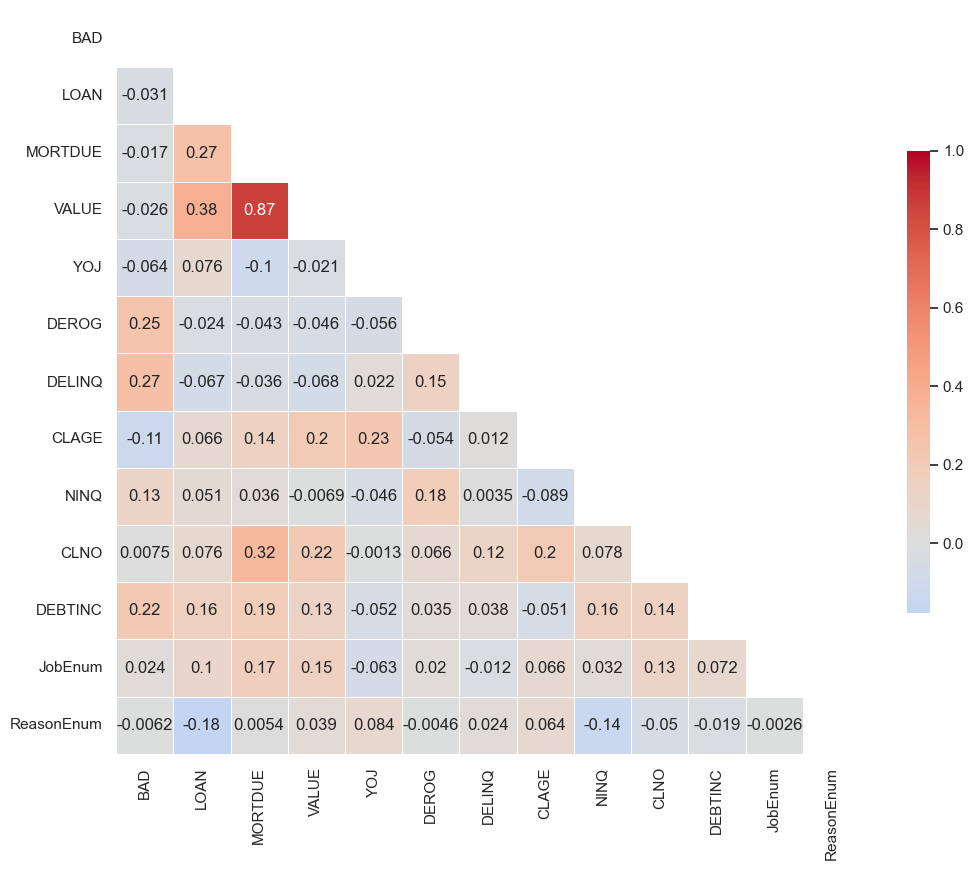

In [18]:
# Vamos a ver la correlacion

corr = df_no_nan._get_numeric_data().corr()  # matriz de correlación

fig, ax = plt.subplots(figsize=(12, 12))

mask = np.triu(np.ones_like(corr, dtype=bool))  # máscara para la matriz triangular superior

# mapa de color coolwarm
color_map = "coolwarm"

# mapa de calor de correlación
sns.heatmap(corr,                      # datos
            mask=mask,                 # máscara blanca
            cmap=color_map,            # color
            vmax=1,                    # borde vertical
            center=0,                  # centro del gráfico
            square=True,               # representación cuadrada de los datos
            linewidth=.5,              # ancho de línea
            cbar_kws={'shrink': .5},   # barra lateral de la leyenda
            annot=True,                # valor de correlación
            ax=ax                      # ejes para el tamaño del gráfico
           )

plt.show()

Como anteriormente en otro notebook comprobamos cual metodo de clasificacion obtenia mayor F1 definiremos la funcion para llamarlo y probar diferentes configuraciones de tratamiento de los datos.


EL metodo de creacion del modelo RandomTree estara por defecto lo que esta funcion tratara sera si se normalizan los datos y si se hace stratify en y


In [8]:
# def ArbolRandom(X,y,normalizar,stratify):
#     if(normalizar)and(stratify):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)
#         scaler = MinMaxScaler()
#         scaler.fit(X_train)#aplicamos el scaler a xtrain y con el scaler resultante transformamos xtrain y xtest
#         X_train_scaler = scaler.transform(X_train)
#         X_test_scaler = scaler.transform(X_test)
#         model = RandomForestClassifier()
#         model.fit(X_train, y_train) 
#         yhat = model.predict(X_test)
#         print(f'MODELO NORMALIZADO CON STRATIFY EN Y')
#         print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
#         print("Exactitud:"    , accuracy_score(y_test, yhat))
#         print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
#         print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
#         print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
#         print("ROC AUC:", roc_auc_score(y_test, yhat))
# #         confusion_matrix(y_test, yhat, labels = [0, 1])
     
# #         plt.figure(figsize=(10,10))
# #         sns.heatmap(confusion_matrix(y_test, yhat, labels = [0, 1]), annot=True, cmap='rainbow')
# #         plt.xlabel('Predicción')
# #         plt.ylabel('Verdad');
# #         plt.title(f'MODELO NORMALIZADO CON STRATIFY EN Y')
#     elif(normalizar)and not(stratify):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
#         scaler = MinMaxScaler()
#         scaler.fit(X_train)#aplicamos el scaler a xtrain y con el scaler resultante transformamos xtrain y xtest
#         X_train_scaler = scaler.transform(X_train)
#         X_test_scaler = scaler.transform(X_test)
#         model = RandomForestClassifier()
#         model.fit(X_train, y_train) 
#         yhat = model.predict(X_test)
#         print(f'MODELO NORMALIZADO SIN STRATIFY EN Y')
#         print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
#         print("Exactitud:"    , accuracy_score(y_test, yhat))
#         print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
#         print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
#         print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
#         print("ROC AUC:", roc_auc_score(y_test, yhat))
#         # confusion_matrix(y_test, yhat, labels = [0, 1])
#         # plt.figure(figsize=(10,10))
#         # sns.heatmap(confusion_matrix(y_test, yhat, labels = [0, 1]), annot=True, cmap='rainbow')
#         # plt.xlabel('Predicción')
#         # plt.ylabel('Verdad');
#         # plt.title(f'MODELO NORMALIZADO SIN STRATIFY EN Y')
#     elif(stratify)and not(normalizar):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)
#         model = RandomForestClassifier()
#         model.fit(X_train, y_train) 
#         yhat = model.predict(X_test)
#         print(f'MODELO SIN NORMALIZADO CON STRATIFY EN Y')
#         print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
#         print("Exactitud:"    , accuracy_score(y_test, yhat))
#         print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
#         print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
#         print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
#         print("ROC AUC:", roc_auc_score(y_test, yhat))
#         # confusion_matrix(y_test, yhat, labels = [0, 1])
#         # plt.figure(figsize=(10,10))
#         # sns.heatmap(confusion_matrix(y_test, yhat, labels = [0, 1]), annot=True, cmap='rainbow')
#         # plt.xlabel('Predicción')
#         # plt.ylabel('Verdad');
#         # plt.title(f'MODELO SIN NORMALIZADO CON STRATIFY EN Y')
#     else:
#          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
#          model = RandomForestClassifier()
#          model.fit(X_train, y_train) 
#          yhat = model.predict(X_test)
#          print(f'MODELO SIN NORMALIZADO CON STRATIFY EN Y')
#          print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
#          print("Exactitud:"    , accuracy_score(y_test, yhat))
#          print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
#          print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
#          print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
#          print("ROC AUC:", roc_auc_score(y_test, yhat))        

In [19]:
#Definimos la X y la y(objetivo)
X=df_no_nan.drop('BAD',axis=1)
y=df_no_nan['BAD']




In [28]:
#Hacemos las llamadas a la funcion definida con las diferentes configuraciones
print('------------------------------------------------------------------')
ArbolRandom(X,y,1,1,0.2,100)
print('------------------------------------------------------------------')
ArbolRandom(X,y,1,0,0.2,100)
print('------------------------------------------------------------------')
ArbolRandom(X,y,0,1,0.2,100)
print('------------------------------------------------------------------')
ArbolRandom(X,y,0,0,0.2,100)
print('------------------------------------------------------------------')

------------------------------------------------------------------
MODELO NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.7448257930317213
Exactitud: 0.9583952451708767
Precisión: 0.9781591263650546
Sensibilidad: 0.7666666666666666
F1-score: 0.8366618126343527
ROC AUC: 0.7666666666666666
------------------------------------------------------------------
MODELO NORMALIZADO SIN STRATIFY EN Y
Jaccard Index: 0.7476394134636748
Exactitud: 0.9613670133729569
Precisión: 0.9644005627575118
Sensibilidad: 0.7719182112385996
F1-score: 0.8385197489848653
ROC AUC: 0.7719182112385996
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.735747663551402
Exactitud: 0.9569093610698366
Precisión: 0.9774143302180686
Sensibilidad: 0.7583333333333333
F1-score: 0.829105555798783
ROC AUC: 0.7583333333333333
------------------------------------------------------------------
MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.737965838

El modelo que mayor F1 nos devuelve es el modelo sin normalizar los datos con stratify en y

In [29]:
ArbolRandom(X,y,0,1,0.2,100)

MODELO SIN NORMALIZADO CON STRATIFY EN Y
Jaccard Index: 0.75390625
Exactitud: 0.9598811292719168
Precisión: 0.97890625
Sensibilidad: 0.775
F1-score: 0.8440645676183611
ROC AUC: 0.775


Vamos a comprobar que el modelo no esta sobre entrenado

In [12]:
X=df_no_nan.drop('BAD',axis=1)
y=df_no_nan['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)
model = RandomForestClassifier()
model.fit(X_train, y_train) 
yhat = model.predict(X_test)

In [13]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1-score en Conjunto de Entrenamiento: {f1_train}')
print(f'F1-score en Conjunto de Prueba: {f1_test}')

F1-score en Conjunto de Entrenamiento: 1.0
F1-score en Conjunto de Prueba: 0.8366618126343527


Comprobamos que esta sobre entrenado ya que se ha memorizado los datos del train vamos a ver como lo cambiamos

In [69]:
model_regularized = RandomForestClassifier(max_depth=12)
model_regularized.fit(X_train, y_train)
yhat = model_regularized.predict(X_test)
y_train_pred_regularized = model_regularized.predict(X_train)
y_test_pred_regularized = model_regularized.predict(X_test)
f1_train_regularized = f1_score(y_train, y_train_pred_regularized, average='macro')
f1_test_regularized = f1_score(y_test, y_test_pred_regularized, average='macro')
print(f'F1-score en Conjunto de Entrenamiento con max_depth = 11: {f1_train_regularized}')
print(f'F1-score en Conjunto de Prueba con max_depth=11: {f1_test_regularized}')

F1-score en Conjunto de Entrenamiento con max_depth = 11: 0.8826906699460741
F1-score en Conjunto de Prueba con max_depth=11: 0.7777295371684618


Se puede comprobar que el modelo ahora se comporta mejor ante datos desconocidos que ante el train por lo tanto esta balanceado


In [15]:
#Hacer una grid para visualizar cual es la mejor configuracion para nuestro RandomForest con los datos que estamos tratando

In [71]:
model_regularized.feature_importances_


array([0.11221035, 0.07545659, 0.08638669, 0.05062121, 0.0995133 ,
       0.14031266, 0.10542272, 0.05857438, 0.08787654, 0.13239509,
       0.0365835 , 0.01464696])

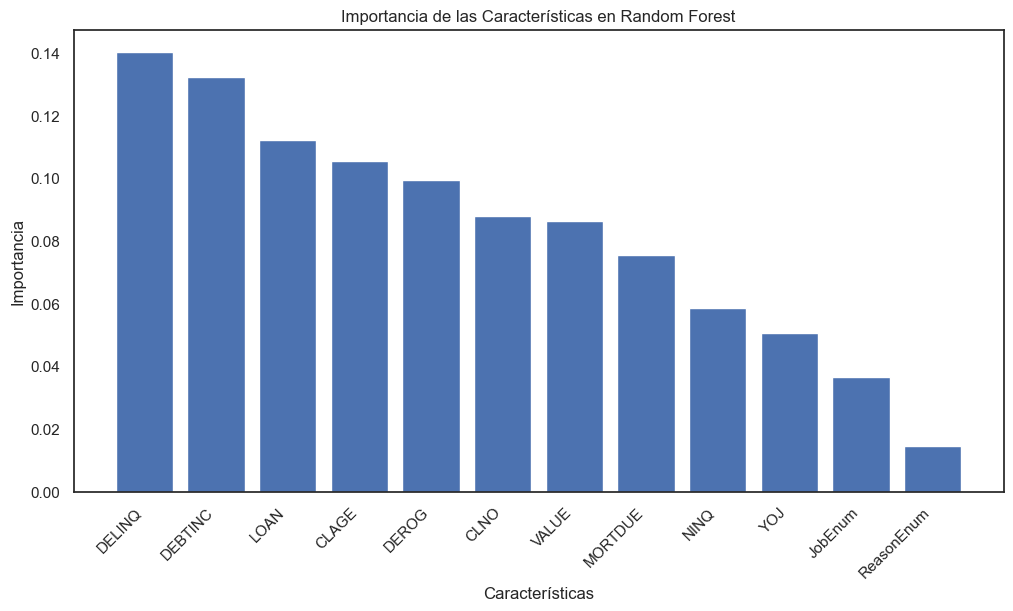

In [73]:
feature_importances = model_regularized.feature_importances_
feature_names = X_train.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[613,   0],
       [ 27,  33]], dtype=int64)

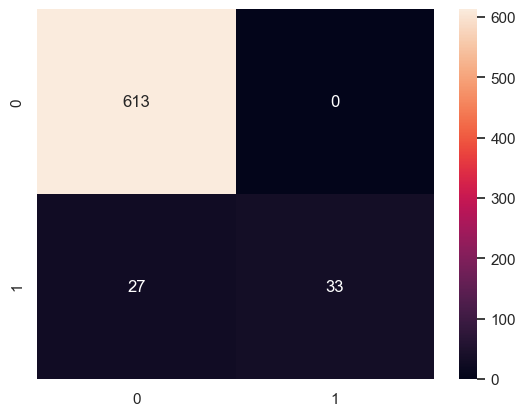

In [19]:
sns.heatmap(confusion_matrix(y_test, yhat, labels = [0, 1]), annot=True, fmt='d');

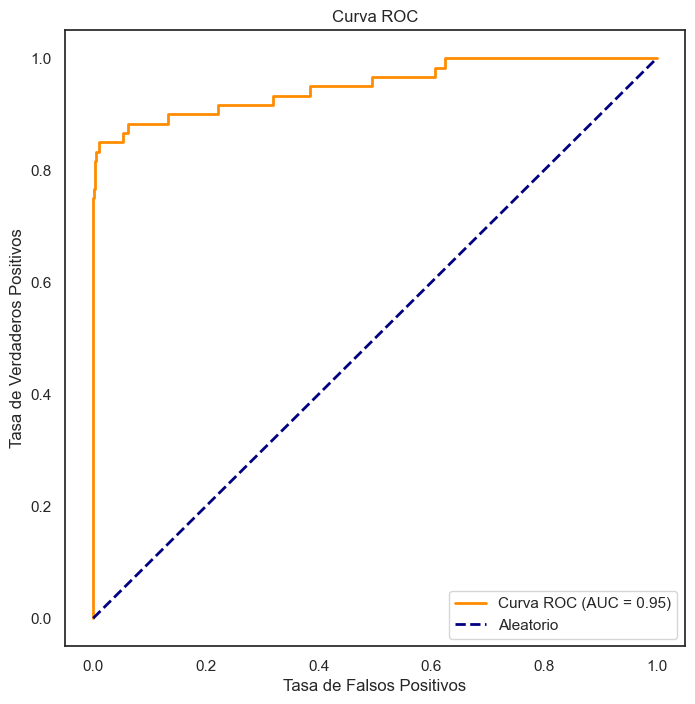

In [20]:
# Obtén las probabilidades predichas para la clase positiva
y_prob = model_regularized.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, umbrales = roc_curve(y_test, y_prob)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [21]:
#Metricas finales del modelo elegido
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud:"    , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
print("ROC AUC:", roc_auc_score(y_test, yhat))




Jaccard Index: 0.75390625
Exactitud: 0.9598811292719168
Precisión: 0.97890625
Sensibilidad: 0.775
F1-score: 0.8440645676183611
ROC AUC: 0.775


In [22]:
df1.shape,df_no_nan.shape

((5960, 13), (3364, 13))

* PARTE 2 DEL EJERCICIO -> EVALIACION DEL MODELO CON TRATAMIENTO SOBRE LOS NAN

In [31]:
df2=df1.copy()
df2['JobEnum']=df2['JOB'].map(dic_job)
df2['ReasonEnum']=df2['REASON'].map(dic_re)
df2.drop(['REASON','JOB'],axis=1,inplace=True)

In [32]:
df2.head(2)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JobEnum,ReasonEnum
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,1.0,2.0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,1.0,2.0


In [33]:
df2 = df2.sort_values(by=['BAD','DEBTINC'])
df2 = df2.reset_index(drop=True)

In [34]:
df2.head(2)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JobEnum,ReasonEnum
0,0,12100,NaN,72731.0,0.0,0.0,0.0,NaN,0.0,0.0,0.720295,NaN,NaN
1,0,13200,NaN,69139.0,0.0,1.0,0.0,NaN,0.0,1.0,1.565931,NaN,NaN


In [35]:
df2.tail(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JobEnum,ReasonEnum
5950,1,50000,167000.0,245000.0,22.0,1.0,7.0,267.900000,2.0,24.0,NaN,5.0,2.0
5951,1,50000,80286.0,145000.0,12.0,NaN,1.0,178.766599,0.0,35.0,NaN,1.0,1.0
5952,1,50000,160000.0,235000.0,0.3,0.0,0.0,184.700000,0.0,41.0,NaN,2.0,1.0
5953,1,56800,95321.0,169000.0,3.0,0.0,0.0,239.433333,4.0,38.0,NaN,1.0,1.0
5954,1,60000,86573.0,159920.0,7.0,0.0,5.0,332.733333,3.0,22.0,NaN,2.0,1.0
5955,1,61400,46126.0,83800.0,33.0,0.0,1.0,339.900000,1.0,23.0,NaN,1.0,NaN
5956,1,63300,202000.0,281000.0,2.0,0.0,0.0,99.433333,2.0,21.0,NaN,2.0,1.0
5957,1,72300,NaN,85000.0,1.0,0.0,0.0,117.166667,9.0,23.0,NaN,1.0,1.0
5958,1,76500,38206.0,90000.0,12.0,0.0,0.0,134.900000,0.0,26.0,NaN,1.0,1.0
5959,1,77200,83962.0,215000.0,8.0,1.0,2.0,71.533132,3.0,14.0,NaN,5.0,2.0


In [36]:
df2.isna().sum()

BAD              0
LOAN             0
MORTDUE        518
VALUE          112
YOJ            515
DEROG          708
DELINQ         580
CLAGE          308
NINQ           510
CLNO           222
DEBTINC       1267
JobEnum        279
ReasonEnum     252
dtype: int64

HEMOS ORDENADO POR DEBTINC POR QUE LO CONSIDERO SEGUN FEATURE IMPORTANCE SIN NAN, UNA VARIABLE DE LA MAS IMPORTANTE CLARO DESPUES DE LA VARIABLE OBJETIVO BAD POR LO QUE PARA RELLENAR LOS NAN HE DECIDIDO HACERLO POR LA MEDIA DE CERCANIA ENTRE EL VECINO DE ARRIBA Y DE ABAJO PARA LO CUAL HAGO LA SIGUIENTE LINEA DE CODIGO

In [37]:
# usar un imputer para darle los valores a los Nan que te dara mas fiabilidad a tu modelo
columnas_a_evaluar = ['MORTDUE', 'VALUE', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


for index, row in df2.iterrows():
    for columna in columnas_a_evaluar:
        # Encuentra las filas más cercanas por arriba y por debajo
        above = df2.loc[index - 1][columna] if index - 1 >= 0 else None
        below = df2.loc[index + 1][columna] if index + 1 < len(df2) else None

        # Calcula la media de las filas más cercanas
        mean_neighbor = pd.Series([above, below]).mean(skipna=True)

        # Rellena el valor nulo con la media calculada
        df2.at[index, columna] = row[columna] if pd.notnull(row[columna]) else mean_neighbor

In [38]:
df2.tail(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JobEnum,ReasonEnum
5950,1,50000,167000.0,245000.0,22.0,1.0,7.0,267.900000,2.0,24.0,203.312149,5.0,2.0
5951,1,50000,80286.0,145000.0,12.0,0.5,1.0,178.766599,0.0,35.0,203.312149,1.0,1.0
5952,1,50000,160000.0,235000.0,0.3,0.0,0.0,184.700000,0.0,41.0,203.312149,2.0,1.0
5953,1,56800,95321.0,169000.0,3.0,0.0,0.0,239.433333,4.0,38.0,203.312149,1.0,1.0
5954,1,60000,86573.0,159920.0,7.0,0.0,5.0,332.733333,3.0,22.0,203.312149,2.0,1.0
5955,1,61400,46126.0,83800.0,33.0,0.0,1.0,339.900000,1.0,23.0,203.312149,1.0,NaN
5956,1,63300,202000.0,281000.0,2.0,0.0,0.0,99.433333,2.0,21.0,203.312149,2.0,1.0
5957,1,72300,120103.0,85000.0,1.0,0.0,0.0,117.166667,9.0,23.0,203.312149,1.0,1.0
5958,1,76500,38206.0,90000.0,12.0,0.0,0.0,134.900000,0.0,26.0,203.312149,1.0,1.0
5959,1,77200,83962.0,215000.0,8.0,1.0,2.0,71.533132,3.0,14.0,203.312149,5.0,2.0


In [39]:
df2.isna().sum()

BAD             0
LOAN            0
MORTDUE        10
VALUE           0
YOJ           515
DEROG           0
DELINQ          0
CLAGE          10
NINQ            0
CLNO            0
DEBTINC         0
JobEnum       279
ReasonEnum    252
dtype: int64

PODRIAMOS TRATAR LOS NAN RESTANTES PERO EN ESTA OCASION VAMOS A DROPEARLOS A VER CUANTOS DATOS NOS QUEDAN

In [40]:
df2.dropna(inplace=True)

In [41]:
print(f'Dimension de los datos originales: {df1.shape}')
print(f'Dimension de los datos con nan tratados: {df2.shape}')

Dimension de los datos originales: (5960, 13)
Dimension de los datos con nan tratados: (5142, 13)


Hemos perdido 800 datos aprox pero tenemos una buena cantidad para trabajar

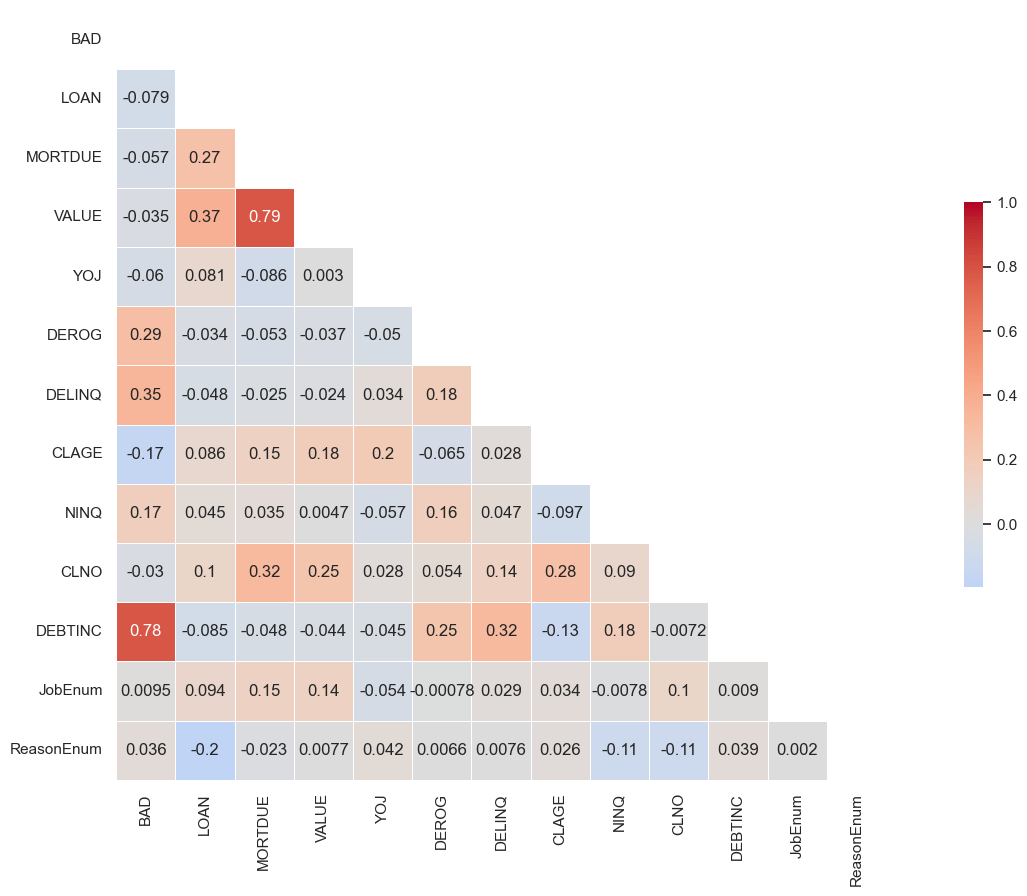

In [42]:
corr = df2._get_numeric_data().corr()  # matriz de correlación

fig, ax = plt.subplots(figsize=(20, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))  # máscara para la matriz triangular superior

# mapa de color coolwarm
color_map = "coolwarm"

# mapa de calor de correlación
sns.heatmap(corr,                      # datos
            mask=mask,                 # máscara blanca
            cmap=color_map,            # color
            vmax=1,                    # borde vertical
            center=0,                  # centro del gráfico
            square=True,               # representación cuadrada de los datos
            linewidth=.5,              # ancho de línea
            cbar_kws={'shrink': .5},   # barra lateral de la leyenda
            annot=True,                # valor de correlación
            ax=ax                      # ejes para el tamaño del gráfico
           )

plt.show()

In [43]:
X=df2.drop('BAD', axis=1)
y=df2.BAD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [44]:
model_regularized = RandomForestClassifier(max_depth=3)
model_regularized.fit(X_train, y_train)
yhat = model_regularized.predict(X_test)
y_train_pred_regularized = model_regularized.predict(X_train)
y_test_pred_regularized = model_regularized.predict(X_test)
f1_train_regularized = f1_score(y_train, y_train_pred_regularized, average='macro')
f1_test_regularized = f1_score(y_test, y_test_pred_regularized, average='macro')
print(f'F1-score en Conjunto de Entrenamiento con max_depth = 3: {f1_train_regularized}')
print(f'F1-score en Conjunto de Prueba con max_depth=3: {f1_test_regularized}')

F1-score en Conjunto de Entrenamiento con max_depth = 3: 0.9035005009252479
F1-score en Conjunto de Prueba con max_depth=3: 0.9044415268348918


In [46]:
model_regularized.feature_importances_

array([3.21567567e-02, 8.00806498e-03, 7.18491181e-03, 1.81488403e-03,
       8.95656689e-02, 1.25672029e-01, 3.29283643e-02, 1.63501856e-02,
       3.88730610e-02, 6.45989236e-01, 1.37152718e-03, 8.53110808e-05])

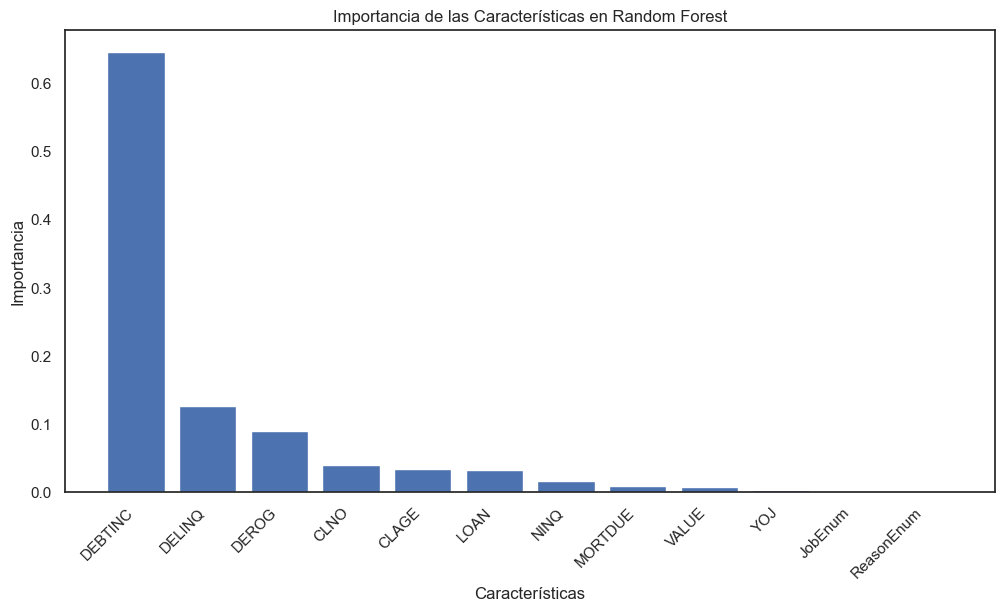

In [47]:
feature_importances = model_regularized.feature_importances_
feature_names = X_train.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

In [48]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[815,   0],
       [ 58, 156]], dtype=int64)

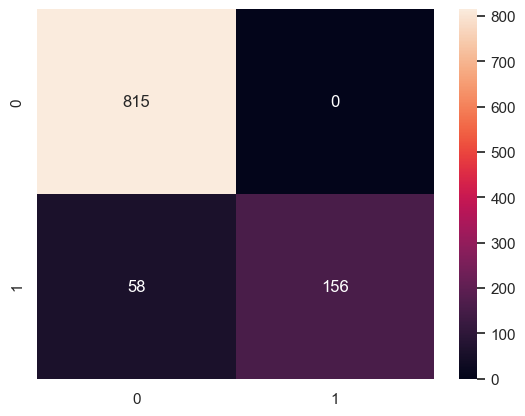

In [49]:
sns.heatmap(confusion_matrix(y_test, yhat, labels = [0, 1]), annot=True, fmt='d');

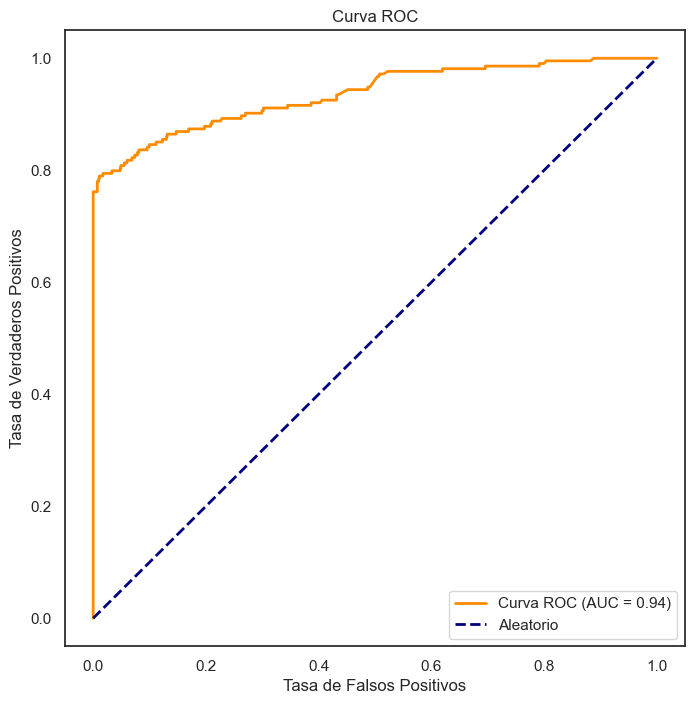

In [50]:
# Obtén las probabilidades predichas para la clase positiva
y_prob = model_regularized.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, umbrales = roc_curve(y_test, y_prob)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [51]:
#Metricas finales del modelo elegido
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud:"    , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
print("ROC AUC:", roc_auc_score(y_test, yhat))


Jaccard Index: 0.8312671955123059
Exactitud: 0.9436345966958212
Precisión: 0.9667812142038946
Sensibilidad: 0.8644859813084111
F1-score: 0.9044415268348918
ROC AUC: 0.8644859813084111


Ahora vamos a utilizar KNNimputer para trabajar con los nan en lugar de hacer la funcion por mi cuenta

In [52]:
df3=df1.copy()

In [ ]:
df3['JobEnum']=df3['JOB'].map(dic_job)
df3['ReasonEnum']=df3['REASON'].map(dic_re)

In [ ]:
df3.drop(['JOB','REASON'],inplace=True,axis=1)

In [59]:
df3 = df3.sort_values(by=['BAD','DEBTINC'])
df3 = df3.reset_index(drop=True)



In [60]:
knn_imputer = KNNImputer(metric='nan_euclidean',weights='distance',n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df3), columns=df3.columns)


In [61]:
print(f'Dimension de los datos originales: {df1.shape}')
print(f'Dimension de los datos con nan tratados: {df_imputed.shape}')

Dimension de los datos originales: (5960, 13)
Dimension de los datos con nan tratados: (5960, 13)


In [62]:
X=df_imputed.drop('BAD', axis=1)
y=df_imputed.BAD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [63]:
model_regularized = RandomForestClassifier(max_depth=9)
model_regularized.fit(X_train, y_train)
yhat = model_regularized.predict(X_test)
y_train_pred_regularized = model_regularized.predict(X_train)
y_test_pred_regularized = model_regularized.predict(X_test)
f1_train_regularized = f1_score(y_train, y_train_pred_regularized, average='macro')
f1_test_regularized = f1_score(y_test, y_test_pred_regularized, average='macro')
print(f'F1-score en Conjunto de Entrenamiento con max_depth = 3: {f1_train_regularized}')
print(f'F1-score en Conjunto de Prueba con max_depth=3: {f1_test_regularized}')

F1-score en Conjunto de Entrenamiento con max_depth = 3: 0.8252834557487514
F1-score en Conjunto de Prueba con max_depth=3: 0.7599596113156386


Conclusion del ejercicio:


Desde que comencé este ejercicio, siempre tuve la duda y el objetivo de determinar si para este caso sería mejor estimar los datos y trabajar con más información o si sería preferible omitir los datos desconocidos y construir un modelo basado únicamente en datos reales.

Modelo con datos reales:

Ventajas:

No hay ninguna estimación en el punto de corte, ya que utilizamos datos reales con toda la información disponible.

La información obtenida de las predicciones trata de  un acierto real sin necesidad de estimaciones.

Desventajas:

No creo que haya manera de mejorar significativamente los resultados, ya que estas métricas son aproximadamente las mejores que podemos obtener.




Modelo con datos estimados (transformación de los NaN):

Ventajas:

El modelo tiene más información para identificar patrones, lo que puede resultar en una mayor precisión en la obtención de datos.

La distancia entre la precision en el grupo de Train y el de Test es menor.






Desventajas:

La ESTIMACIÓN; el 100% de la precisión de este modelo depende de dicha estimación. Tras evaluar varias estimaciones, he considerado la mejor aquella que he usado con el orden de DEBTINC y las medias de los nulos del vecino superior e inferior. Aunque el modelo mostraba solo correlación entre MORDUE y VALUE, la fórmula del DEBTINC lleva implícitos MORDUE y LOAN, además de los INCOMES, pero no podemos obtener este último.
Ademas tambien he tenido en cuente que en el modelo anterior al sacar las features importances DEBTINC era la que tenia un mayor peso.




Conclusión final:

Para trabajar con modelos de clasificación, la importancia de si vas a tratar los NaN o no depende de tu capacidad para realizar la estimación. En este ejercicio, opté por presentar ambos modelos y sugerir la prueba con nuevos datos para evaluar la precisión de las predicciones.

Aunque el segundo modelo pueda tener un rendimiento superior, los patrones que identifica se basan en estimaciones del usuario. Aunque el mundo ideal donde conocemos todos los datos no exista en la realidad, mi objetivo en el aprendizaje automático es lograr que mi modelo se asemeje lo más posible a ese mundo ideal y tenga el menor margen de error posible.


